<a href="https://colab.research.google.com/github/Arjun650/MachineLearning/blob/main/lab_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#test for lab_03 assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import pandas as pd

data = pd.read_csv('./team01.csv')
print(data.head(10))


  Timestamp     Speaker                               Transcript      Label
0  00:00:02   Speaker 1                                Yes, Sir.  Statement
1  00:00:05   Speaker 1                                     And.  Statement
2  00:00:07   Speaker 1             Then we go to with that, OK.  Statement
3  00:00:10   Speaker 1                                 OK, Sir.  Statement
4  00:00:11   Speaker 1                                    Yeah.  Statement
5  00:00:13   Speaker 1           Itself is all new to yourself.  Statement
6  00:00:19   Speaker 2                                      OK   Statement
7  01:00:19   Speaker 1                                       OK  Statement
8  00:00:23   Speaker 2  Can you tell me name of one classifier?   Question
9  00:00:27   Speaker 3           Which is non linear in nature.   Question


In [3]:
data.columns

Index(['Timestamp', 'Speaker', 'Transcript', 'Label'], dtype='object')

In [4]:
data.isnull().sum()

,0
Timestamp,0
Speaker,0
Transcript,0
Label,0


In [11]:
statements = data[data['Label'] == 'Statement']
questions = data[data['Label'] == 'Question']
answers = data[data['Label'] == 'Answer']

sentiment_counts = data['Label'].value_counts(normalize=True)

sentiment_counts



,proportion
Label,
Statement,0.446154
Question,0.292308
Answer,0.261538


In [17]:
vectorizer = TfidfVectorizer()
X_all = vectorizer.fit_transform(data['Transcript']).toarray()
X_statements = X_all[data['Label'] == 'Statement']
X_questions = X_all[data['Label'] == 'Question']
X_answers = X_all[data['Label'] == 'Answer']

centroid_statements = np.mean(X_statements, axis=0) if len(X_statements) > 0 else np.array([])
centroid_questions = np.mean(X_questions, axis=0) if len(X_questions) > 0 else np.array([])
centroid_answers = np.mean(X_answers, axis=0) if len(X_answers) > 0 else np.array([])



In [18]:
spread_statements = np.std(X_statements, axis=0) if len(X_statements) > 0 else np.array([])
spread_questions = np.std(X_questions, axis=0) if len(X_questions) > 0 else np.array([])
spread_answers = np.std(X_answers, axis=0) if len(X_answers) > 0 else np.array([])

In [19]:
distance_statements_questions = np.linalg.norm(centroid_statements - centroid_questions) if centroid_statements.size and centroid_questions.size else None
distance_statements_answers = np.linalg.norm(centroid_statements - centroid_answers) if centroid_statements.size and centroid_answers.size else None
distance_questions_answers = np.linalg.norm(centroid_questions - centroid_answers) if centroid_questions.size and centroid_answers.size else None

In [20]:
print("Centroid of Statements:", centroid_statements)
print("Centroid of Questions:", centroid_questions)
print("Centroid of Answers:", centroid_answers)

print("Spread of Statements:", spread_statements)
print("Spread of Questions:", spread_questions)
print("Spread of Answers:", spread_answers)

print("Interclass Distance between Statements and Questions:", distance_statements_questions)
print("Interclass Distance between Statements and Answers:", distance_statements_answers)
print("Interclass Distance between Questions and Answers:", distance_questions_answers)

Centroid of Statements: [0.         0.         0.         0.01546032 0.         0.03448276
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.02208843 0.         0.         0.
 0.02779645 0.         0.02269219 0.         0.         0.
 0.03042659 0.         0.04791232 0.         0.         0.
 0.0237011  0.         0.00902451 0.         0.01546032 0.
 0.01389823 0.         0.         0.         0.0148569  0.
 0.         0.02438299 0.         0.         0.01888303 0.
 0.         0.         0.         0.         0.         0.
 0.02208843 0.01546032 0.04476978 0.         0.         0.
 0.         0.         0.03448276 0.32505641 0.         0.
 0.         0.         0.         0.         0.         0.
 0.02550583 0.         0.         0.         0.         0.
 0.         0.02438299 0.         0.         0.         0.15502586
 0.03448276 0.         0.         0.         0.         0.
 0.         0.03

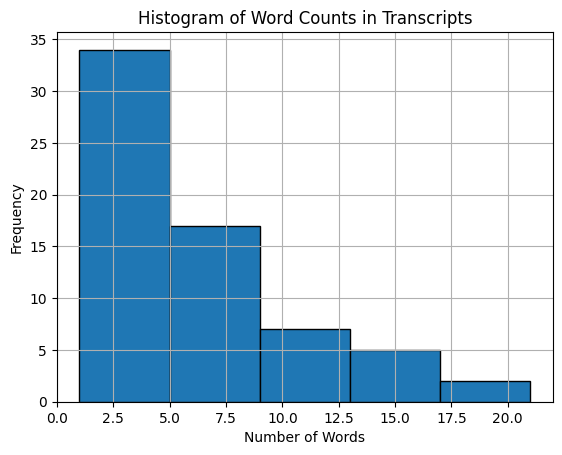

Mean Word Count: 5.6
Variance of Word Count: 23.44


In [25]:
import numpy as np
import matplotlib.pyplot as plt



word_counts = [len(transcript.split()) for transcript in data['Transcript']]


hist, bin_edges = np.histogram(word_counts, bins=5)

mean_word_count = np.mean(word_counts)
variance_word_count = np.var(word_counts)

plt.hist(word_counts, bins=5, edgecolor='black')
plt.title('Histogram of Word Counts in Transcripts')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


print("Mean Word Count:", mean_word_count)
print("Variance of Word Count:", variance_word_count)


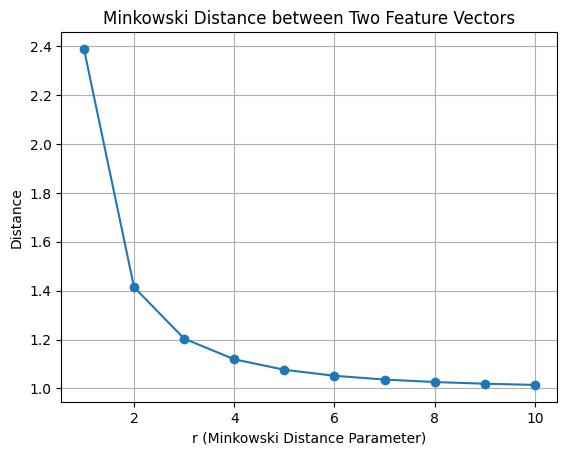

Minkowski Distance (r=1): 2.3883432152748716
Minkowski Distance (r=2): 1.4142135623730951
Minkowski Distance (r=3): 1.203807630661758
Minkowski Distance (r=4): 1.1193508983639573
Minkowski Distance (r=5): 1.076536805093395
Minkowski Distance (r=6): 1.0519130598265618
Minkowski Distance (r=7): 1.0365648977057544
Minkowski Distance (r=8): 1.02644929956453
Minkowski Distance (r=9): 1.0195071261924085
Minkowski Distance (r=10): 1.0145974716058157


In [26]:
import numpy as np
import matplotlib.pyplot as plt


vector1 = X_all[0]
vector2 = X_all[1]

def minkowski_distance(x, y, r):
    return np.sum(np.abs(x - y) ** r) ** (1 / r)

r_values = np.arange(1, 11)
distances = [minkowski_distance(vector1, vector2, r) for r in r_values]

plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance between Two Feature Vectors')
plt.xlabel('r (Minkowski Distance Parameter)')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

for r, dist in zip(r_values, distances):
    print(f"Minkowski Distance (r={r}): {dist}")


In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


filtered_data = data[data['Label'].isin(['Statement', 'Question'])]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(filtered_data['Transcript']).toarray()

y = np.where(filtered_data['Label'] == 'Statement', 0, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 33 samples
Testing set size: 15 samples


In [30]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.6666666666666666
Confusion Matrix:
[[6 5]
 [0 4]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.55      0.71        11
           1       0.44      1.00      0.62         4

    accuracy                           0.67        15
   macro avg       0.72      0.77      0.66        15
weighted avg       0.85      0.67      0.68        15



In [32]:
# Step 1: Test the accuracy of the kNN classifier using the test set
accuracy = knn.score(X_test, y_test)

# Output the accuracy
print(f"Accuracy of kNN classifier on the test set: {accuracy}")


Accuracy of kNN classifier on the test set: 0.6666666666666666


In [33]:
# Step 1: Predict the class labels for all test vectors
y_pred_all = knn.predict(X_test)

# Output the predicted labels
print("Predicted labels for the test set:")
print(y_pred_all)

# Step 2: Predict the class of a specific test vector
# Select the first vector from the test set as an example
test_vect = X_test[0]
predicted_class = knn.predict([test_vect])

# Output the predicted class for the specific test vector
print(f"Predicted class for the test vector {test_vect}: {predicted_class[0]}")


Predicted labels for the test set:
[0 1 0 1 1 0 1 1 1 0 1 0 0 1 1]
Predicted class for the test vector [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]: 0
